# Importing the Libraries

In [57]:
#import libraries
import pandas as pd
import numpy as np
import requests
import re
import random
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
import collections
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from urllib import request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import cohen_kappa_score
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing the dataset

In [58]:
urls = ["https://www.gutenberg.org/files/50928/50928.txt"
,"https://www.gutenberg.org/files/29181/29181.txt"
,"https://www.gutenberg.org/files/69703/69703-0.txt"
,"https://www.gutenberg.org/files/30214/30214.txt"
,"https://www.gutenberg.org/files/64873/64873-0.txt"]
Names = ["Hot Planet" ,"Foundling on Venus" , "The master mind of Mars"  , "The Red Hell of Jupiter" ,"Ice Planet"]
Authors = ["Hal Clement" ,"Dorothy De Courcy and John De Courcy" ,"Edgar Rice Burroughs" , "Paul Ernst" ,"Carl Selwyn"]
Labels = [ 'a' ,'b' ,'c','d' ,'e']

In [59]:
def prepare_data(url, name, author, label,index):

    response = request.urlopen(url)
    lines = (response.read().decode('utf8')).lower()
    tokens= regexp_tokenize(lines,r'([a-zA-Z]{3,})[\,|\s|\.]')

    isalpha = [word.lower() for word in tokens if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    nostop = [w for w in isalpha if not w in stop_words]

    lemma=[]
    lemmatizer = WordNetLemmatizer()
    lemma=[lemmatizer.lemmatize(w) for w in nostop]

    book = []
    for i in range(200):
        start = random.randint(0 , len(lemma)-150)
        book.append(' '.join( lemma[start:start+150]))

        df = pd.DataFrame()
        df["partitions"] = book
        df["name"] = name
        df["author"] = author
        df["Label"] = label
        df["index"] = index
    return df

In [60]:
data = pd.DataFrame()
for index, (url, name, author, label) in enumerate(zip(urls, Names, Authors, Labels)):
    data = pd.concat([data, prepare_data(url, name, author, label, index)])

data.reset_index(drop=True, inplace=True)
data

,partitions,name,author,Label,index
0,property agreement agree abide term agreement ...,Hot Planet,Hal Clement,a,0
1,afraid without adventure zaino grimaced sound ...,Hot Planet,Hal Clement,a,0
2,fast saw tell much come unless stop nothing ke...,Hot Planet,Hal Clement,a,0
3,service ein federal tax identification number ...,Hot Planet,Hal Clement,a,0
4,access electronic work freely sharing project ...,Hot Planet,Hal Clement,a,0
...,...,...,...,...,...
995,far smooth horizon dull red ball cast feeble l...,Ice Planet,Carl Selwyn,e,4
996,attuned molly borden purred know went liner va...,Ice Planet,Carl Selwyn,e,4
997,eye spoke woman key left vest pocket said take...,Ice Planet,Carl Selwyn,e,4
998,puff flesh sit smiled much talk ricker found w...,Ice Planet,Carl Selwyn,e,4


# Data Visualiztion

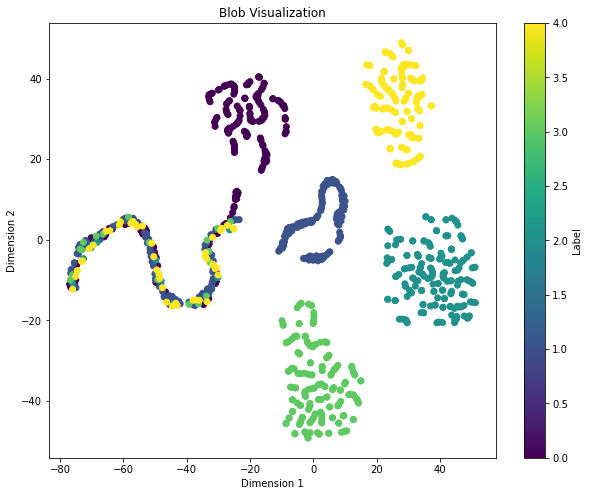

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["partitions"])

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(tfidf_matrix)

# Extract x and y coordinates for visualization
x = tsne_data[:, 0]
y = tsne_data[:, 1]

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data["Label"])

# Create a scatter plot of the blob visualization
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=encoded_labels, cmap="viridis")
plt.title("Blob Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Label")
plt.show()

In [61]:
human_label=np.array(data.iloc[:,-1])

In [62]:
def map_label(labels,old_labels,num_class=5):
    new_labels=[]

    for idx in range(5):
        dict_labels=Counter(labels[200*idx:200*idx+200])
        flag=0

        for i in dict_labels:

            if dict_labels[i]> flag and i not in new_labels :

                flag=dict_labels[i]
                index=i
        if index not in new_labels:
          new_labels.append(index)
        else:
          for i in range(5):
            if i not in new_labels:
              new_labels.append(i)



    for indx , label in enumerate(new_labels):
        old_labels[indx*200:200*indx+200]=label
    return old_labels

# BOW

In [8]:
#BOW
from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer()
BOW_vectors = coun_vect.fit_transform(data["partitions"])
count_array = BOW_vectors.toarray()

BOW_df = pd.DataFrame(count_array,columns = coun_vect.get_feature_names_out())
BOW_df

,abandoned,abandoning,abhorrence,abide,able,ablest,aboard,abroad,abrupt,abruptly,...,zaino,zak,zephyr,zero,zinc,zip,zode,zone,zoom,zoomed
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,2,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **K_Means**

In [14]:
#K_Means BOW
KM_BOW=KMeans(n_clusters=5, random_state=42)
KM_BOW.fit(BOW_df)
KM_BOW_LABEL=KM_BOW.predict(BOW_df)
KM_BOW_LABEL_NEW=map_label(KM_BOW_LABEL,human_label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
print(KM_BOW_LABEL)
print("**********************")
print(KM_BOW_LABEL_NEW)

[3 2 3 3 3 4 2 2 3 3 3 3 3 2 3 3 4 3 3 4 3 3 2 2 2 3 3 2 3 4 3 3 3 3 3 3 2
 4 2 2 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 4 2 3 2 3 3 2 3 3 3 3 3 3 2 3
 2 3 3 4 3 3 2 3 3 3 3 3 3 3 3 3 2 2 4 3 2 2 2 3 2 3 3 3 3 2 2 2 3 3 3 3 3
 3 2 3 2 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 2 3 3 3 3 3 2 3 3 3
 3 2 3 3 2 3 2 4 4 2 3 3 2 3 2 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 3 2 3 3 3 3 3 3 2 2 2 3 2 4 2 2 3 2 3 4 3 4 2 2 2 2 3 3 2 2 2 3 3 2 2
 2 2 2 3 2 3 2 3 3 3 2 3 4 2 4 3 4 4 2 2 4 3 4 2 3 2 3 3 3 2 4 2 3 3 3 3 3
 3 4 2 2 2 4 3 2 3 3 4 3 3 2 3 3 2 2 3 2 2 3 3 3 2 3 2 2 4 4 3 2 3 2 3 3 2
 3 3 3 4 2 2 3 3 4 2 3 3 4 4 3 3 2 2 3 4 2 3 3 3 2 3 3 3 2 2 3 3 3 4 2 3 3
 2 3 2 3 2 3 3 3 4 2 3 2 2 3 2 3 3 3 3 3 4 3 3 2 3 2 2 3 3 3 3 2 2 2 2 2 3
 4 2 3 3 3 4 2 3 4 3 3 4 2 2 2 4 3 3 3 3 4 2 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [16]:
#kappa
kappa_score_kmeans_BOW =cohen_kappa_score(KM_BOW_LABEL,KM_BOW_LABEL_NEW)
print("kappa score in kmeans BOW = ", kappa_score_kmeans_BOW)

#silhouette
silhouette_score_kmeans_BOW = silhouette_score(BOW_df, KM_BOW_LABEL)
print("silhouette score in kmeans BOW = ", silhouette_score_kmeans_BOW)

kappa score in kmeans BOW =  0.4425
silhouette score in kmeans BOW =  0.08308448141172835


Error Analysis (Using Elbow Method)

In [19]:
# Elbow Method
k_values = range(1, 11)
distortion_values = []
inertia_values = []

for k in k_values:
    KM_BOW = KMeans(n_clusters=k, random_state=42)
    KM_BOW.fit(BOW_df)
    distortion_values.append(KM_BOW.inertia_)
    inertia_values.append(KM_BOW.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Visualizing the Results (Using the different values of Distortion)

    k     Distortion
0   1  246703.022000
1   2  206883.018061
2   3  196677.685919
3   4  190820.665555
4   5  186577.109232
5   6  180514.324198
6   7  176603.153807
7   8  172228.113638
8   9  168194.572586
9  10  164202.492369


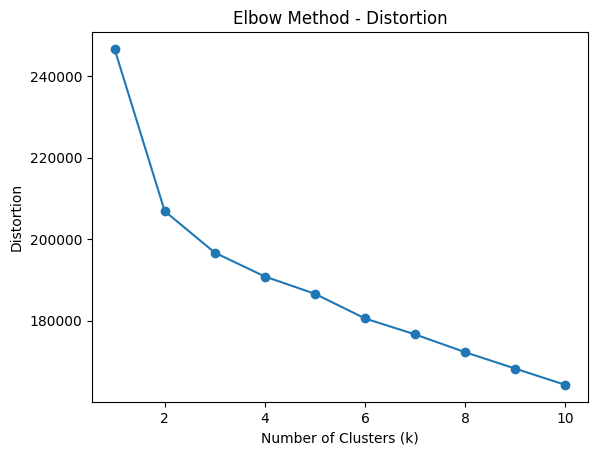

In [20]:
# Tabulate the results
results_df = pd.DataFrame({'k': k_values, 'Distortion': distortion_values})
print(results_df)

# Plotting the results
plt.plot(k_values, distortion_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method - Distortion')
plt.show()

Visualizing the Results (Using different values of Inertia)

    k        Inertia
0   1  246703.022000
1   2  206883.018061
2   3  196677.685919
3   4  190820.665555
4   5  186577.109232
5   6  180514.324198
6   7  176603.153807
7   8  172228.113638
8   9  168194.572586
9  10  164202.492369


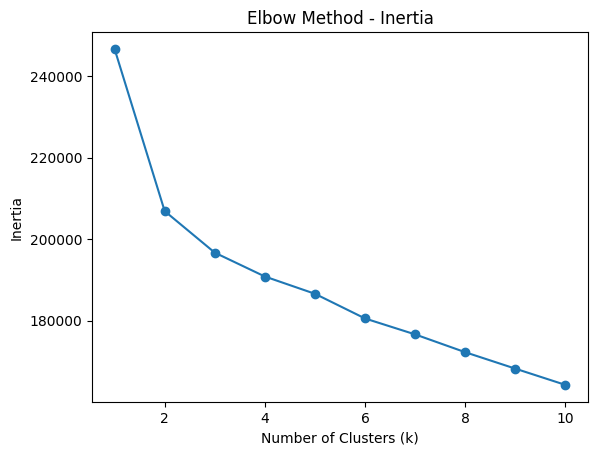

In [21]:
# Tabulate the results
results_df = pd.DataFrame({'k': k_values, 'Inertia': inertia_values})
print(results_df)

# Plotting the results
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

# EM clustering algorithm

In [10]:
# EM clustering algorithm
em = GaussianMixture(n_components=5, random_state=42)
em.fit(BOW_df)
EM_BOW_LABEL = em.predict(BOW_df)
EM_BOW_LABEL_NEW=map_label(EM_BOW_LABEL,human_label)
EM_BOW_LABEL

array([2, 2, 2, 4, 4, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 4,
       2, 4, 4, 2, 3, 2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 4, 2, 4, 3, 2, 2,
       1, 2, 3, 3, 2, 4, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 4, 2, 2, 1, 2, 4, 2, 3, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 4, 2, 2, 4, 2, 2, 2, 3, 2,
       2, 3, 0, 4, 0, 0, 4, 3, 0, 0, 0, 4, 3, 3, 0, 4, 0, 4, 0, 1, 3, 0,
       0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4,
       0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 4, 3, 4, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 3, 1, 3, 3, 0, 4, 3, 3, 1, 0, 0, 1, 1, 4, 4, 0, 4, 4, 0, 0, 4,
       0, 0, 0, 4, 1, 3, 0, 0, 0, 0, 1, 0, 0, 3, 1,

In [11]:
#kappa
kappa_score_EM_BOW =cohen_kappa_score(EM_BOW_LABEL,EM_BOW_LABEL_NEW)
print("kappa score in EM BOW = ", kappa_score_EM_BOW)

#silhouette
silhouette_score_EM_BOW = silhouette_score(BOW_df, EM_BOW_LABEL)
print("silhouette score in EM BOW = ", silhouette_score_EM_BOW)

kappa score in EM BOW =  0.30874999999999997
silhouette score in EM BOW =  0.06909859218634004


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


# Akaike information criterion (AIC) or the Bayesian information criterion (BIC)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


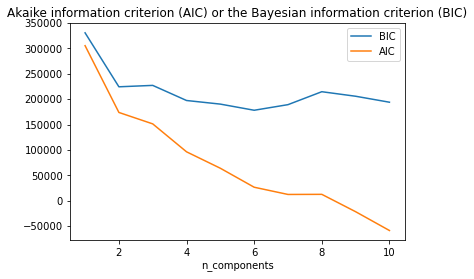

In [22]:
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

n_components = np.arange(1, 11)
models = [GaussianMixture(n, random_state=0) for n in n_components]
bic_scores = []
aic_scores = []

# Subsample the data
subsample_size = 1000
BOW_df_subsample = shuffle(BOW_df, random_state=0)[:subsample_size]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components as needed
BOW_df_pca = pca.fit_transform(BOW_df_subsample)

for model in models:
    # Fit the model on the PCA-transformed data
    model.fit(BOW_df_pca)

    # Calculate AIC and BIC scores
    bic_scores.append(model.bic(BOW_df_pca))
    aic_scores.append(model.aic(BOW_df_pca))

# Plotting the results
plt.plot(n_components, bic_scores, label='BIC')
plt.plot(n_components, aic_scores, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('Akaike information criterion (AIC) or the Bayesian information criterion (BIC)')

plt.show()

# Hierarchical clustering algorithm

In [23]:
# Hierarchical clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict((BOW_df))
Hierarchical_BOW_LABEL_NEW=map_label(hierarchical_labels,human_label)
hierarchical_labels

array([1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 3,
       1, 0, 0, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 0, 1, 0, 2, 1, 1,
       3, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 3, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0,
       1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 3,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1,

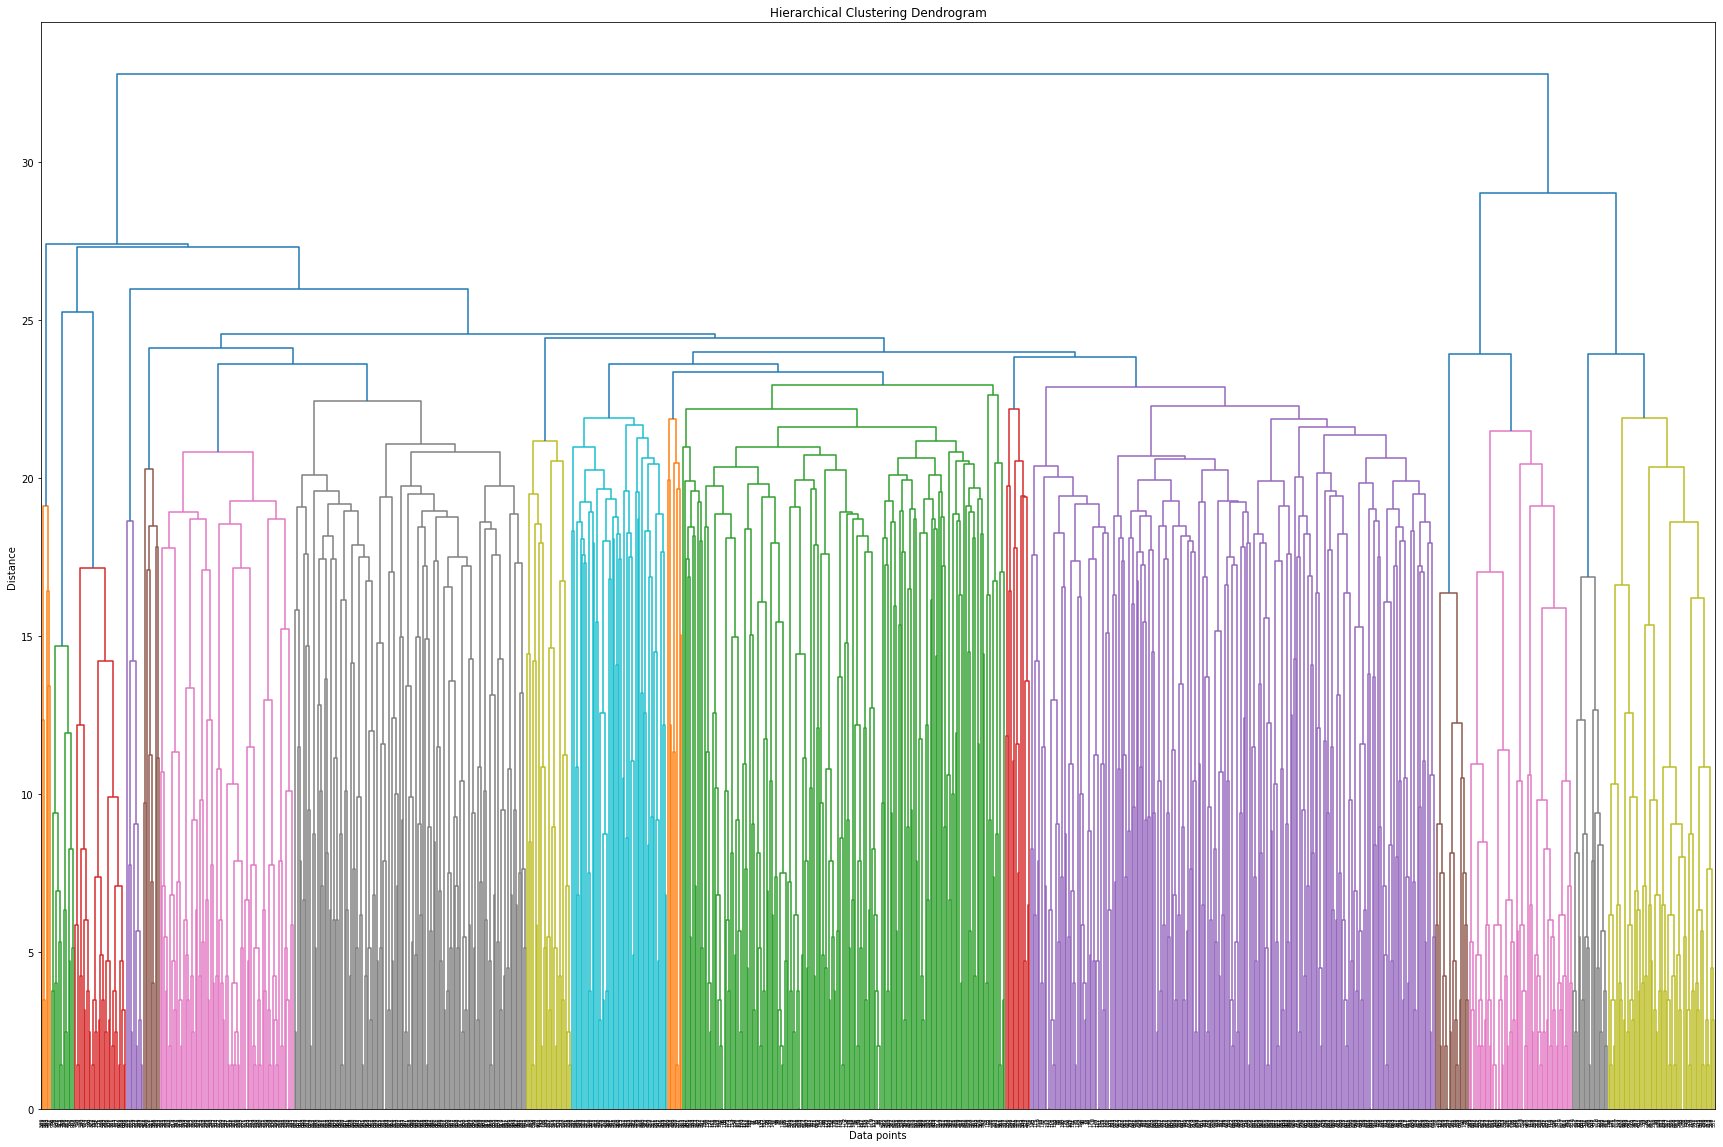

In [28]:
linked = linkage(count_array, 'complete')  # You can choose different linkage methods (single, complete, average, etc.)

# Create a dendrogram
plt.figure(figsize=(30, 20))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [29]:
#kappa
kappa_score_Hierarchical_BOW =cohen_kappa_score(hierarchical_labels,Hierarchical_BOW_LABEL_NEW)
print("kappa score in Hierarchical BOW = ", kappa_score_Hierarchical_BOW)

#silhouette
silhouette_score_Hierarchical_BOW = silhouette_score(BOW_df, hierarchical_labels)
print("silhouette score in EM BOW = ", silhouette_score_Hierarchical_BOW)

kappa score in Hierarchical BOW =  0.20125000000000004
silhouette score in EM BOW =  0.07647901878686435


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


# Error Analysis (Using adjusted Rand index)

In [30]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score

# Calculate adjusted Rand index
ari_score = adjusted_rand_score(human_label, hierarchical_labels)

print("Adjusted Rand index:", ari_score)

Adjusted Rand index: 0.1954633615937071


# Error Analysis (Using Fowlkes-Mallows index)

In [31]:
# Calculate Fowlkes-Mallows index
fm_score = fowlkes_mallows_score(human_label, hierarchical_labels)

print("Fowlkes-Mallows index:", fm_score)

Fowlkes-Mallows index: 0.4454864634137153


# TF-IDF

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['partitions'])
dense = vectors.toarray()

TF_IDF_df = pd.DataFrame(dense, columns=vectorizer.get_feature_names_out())
TF_IDF_df

# K_Means

In [33]:
#K_Means TF_IDF
KM_TF_IDF=KMeans(n_clusters=5, random_state=42)
KM_TF_IDF.fit(TF_IDF_df)
KM_TF_IDF_LABEL=KM_TF_IDF.predict(TF_IDF_df)
KM_TF_IDF_LABEL_NEW=map_label(KM_TF_IDF_LABEL,human_label)

In [34]:
#kappa
kappa_score_kmeans_TF_IDF=cohen_kappa_score(KM_TF_IDF_LABEL,KM_TF_IDF_LABEL_NEW)
print("kappa score in kmeans TF_IDF = ", kappa_score_kmeans_TF_IDF)

#silhouette
silhouette_score_kmeans_TF_IDF = silhouette_score(TF_IDF_df, KM_TF_IDF_LABEL)
print("silhouette score in kmeans TF_IDF = ", silhouette_score_kmeans_TF_IDF)

kappa score in kmeans TF_IDF =  0.27749999999999997
silhouette score in kmeans TF_IDF =  0.06999344396773075


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


# Error Analysis (Using Elbow Method)

In [35]:
# Elbow Method
k_values = range(1, 11)
distortion_values = []
inertia_values = []

for k in k_values:
    KM_TF_IDF = KMeans(n_clusters=k, random_state=42)
    KM_TF_IDF.fit(TF_IDF_df)
    distortion_values.append(KM_TF_IDF.inertia_)
    inertia_values.append(KM_TF_IDF.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# Visualizing the Results (Using the different values of Distortion)

    k  Distortion
0   1  940.660678
1   2  869.125831
2   3  849.103962
3   4  833.020956
4   5  816.543296
5   6  800.321032
6   7  777.841175
7   8  762.845728
8   9  751.532890
9  10  739.305869


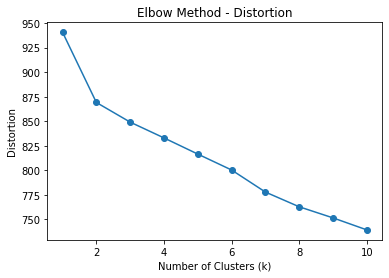

In [36]:
# Tabulate the results
results_df = pd.DataFrame({'k': k_values, 'Distortion': distortion_values})
print(results_df)

# Plotting the results
plt.plot(k_values, distortion_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method - Distortion')
plt.show()

# Visualizing the Results (Using different values of Inertia)

    k     Inertia
0   1  940.660678
1   2  869.125831
2   3  849.103962
3   4  833.020956
4   5  816.543296
5   6  800.321032
6   7  777.841175
7   8  762.845728
8   9  751.532890
9  10  739.305869


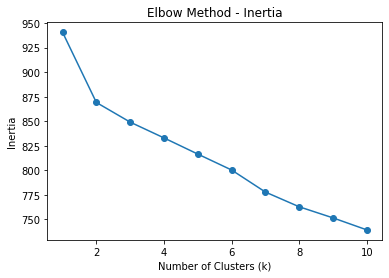

In [37]:
# Tabulate the results
results_df = pd.DataFrame({'k': k_values, 'Inertia': inertia_values})
print(results_df)

# Plotting the results
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

# EM clustering algorithm

In [38]:
# EM clustering algorithm
em = GaussianMixture(n_components=5, random_state=42)
em.fit(TF_IDF_df)
EM_TFIDF_LABEL = em.predict(TF_IDF_df)
EM_TFIDF_LABEL_NEW=map_label(EM_TFIDF_LABEL,human_label)
EM_TFIDF_LABEL

array([2, 2, 2, 3, 0, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 4, 2, 3, 2, 2, 2, 3,
       4, 3, 0, 4, 3, 4, 3, 3, 2, 2, 4, 2, 4, 2, 2, 2, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 4, 3, 3, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 0, 2, 0, 3, 4, 2,
       3, 2, 3, 3, 2, 0, 2, 2, 0, 2, 4, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 0,
       0, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 3, 4, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 4, 2,
       3, 4, 2, 2, 2, 4, 2, 2, 2, 3, 0, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 0, 2, 2, 3, 2, 3, 2, 3, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 0, 3, 2, 2, 0, 2, 2, 2, 3, 2,
       3, 3, 4, 0, 4, 4, 0, 3, 4, 4, 4, 0, 3, 3, 4, 0, 4, 3, 4, 4, 3, 4,
       4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 3, 4, 4, 0, 0,
       4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 3, 3, 3, 4, 0, 3, 3, 4, 4, 4, 4, 4, 0, 0, 4, 0, 0, 4, 4, 3,
       4, 4, 4, 0, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4,

In [39]:
#kappa
kappa_score_EM_TFIDF =cohen_kappa_score(EM_TFIDF_LABEL,EM_TFIDF_LABEL_NEW)
print("kappa score in EM TFIDF = ", kappa_score_EM_TFIDF)

#silhouette
silhouette_score_EM_TFIDF = silhouette_score(TF_IDF_df, EM_TFIDF_LABEL)
print("silhouette score in EM TFIDF = ", silhouette_score_EM_TFIDF)

kappa score in EM TFIDF =  0.29374999999999996
silhouette score in EM TFIDF =  0.0533462963446379


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


# Akaike information criterion (AIC) or the Bayesian information criterion (BIC)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


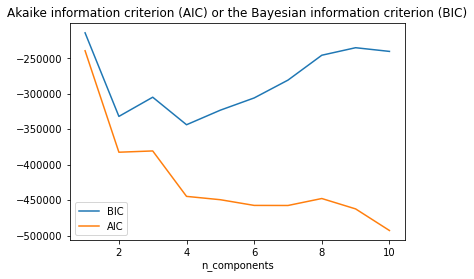

In [41]:
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

n_components = np.arange(1, 11)
models = [GaussianMixture(n, random_state=0) for n in n_components]
bic_scores = []
aic_scores = []

# Subsample the data
subsample_size = 1000
Tfidf_subsample = shuffle(TF_IDF_df, random_state=0)[:subsample_size]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components as needed
Tfidf_pca = pca.fit_transform(Tfidf_subsample)

for model in models:
    # Fit the model on the PCA-transformed data
    model.fit(Tfidf_pca)

    # Calculate AIC and BIC scores
    bic_scores.append(model.bic(Tfidf_pca))
    aic_scores.append(model.aic(Tfidf_pca))

# Plotting the results
plt.plot(n_components, bic_scores, label='BIC')
plt.plot(n_components, aic_scores, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('Akaike information criterion (AIC) or the Bayesian information criterion (BIC)')

plt.show()

# Hierarchical clustering algorithm

In [74]:
# Hierarchical clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict((TF_IDF_df))
Hierarchical_TFIDF_LABEL_NEW=map_label(hierarchical_labels,human_label)
hierarchical_labels

array([0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 2, 2,
       0, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 1, 2, 3, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1,
       2, 3, 3, 2, 4, 0, 0, 4, 0, 4, 1, 4, 2, 2, 3, 4, 4, 4, 3, 3, 4, 4,
       4, 1, 4, 4, 3, 2, 2, 4, 4, 2, 2, 4, 4, 4, 0, 4, 2, 2, 0, 4, 2, 2,
       4, 2, 4, 2, 2, 4, 4, 0, 3, 3, 2, 2, 4, 4, 1, 4, 2, 0, 1, 2, 4, 2,
       2, 1, 0, 2, 0, 4, 4, 2, 3, 1, 4, 1, 1, 4, 1, 1, 4, 4, 3, 4, 4, 1,
       4, 4, 0, 1, 2, 4, 4, 1, 2, 1, 4, 3, 4, 2, 4,

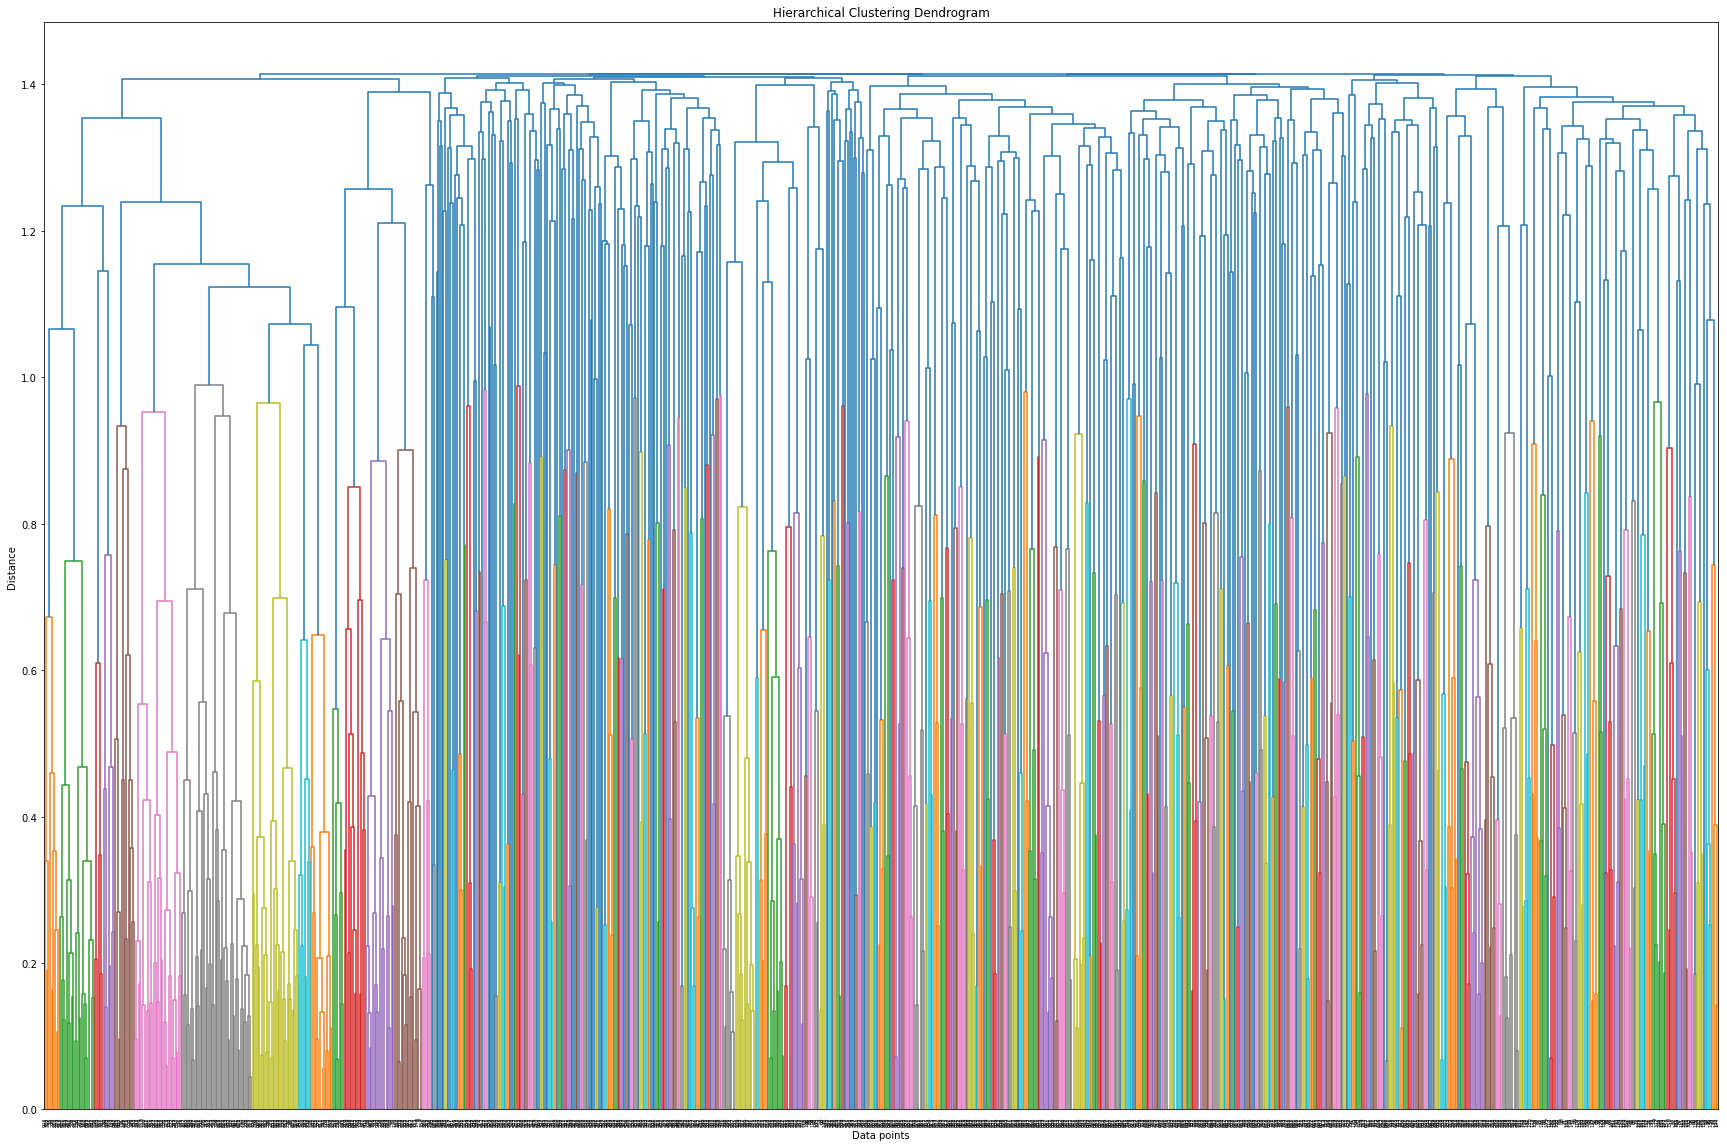

In [75]:
linked = linkage(dense, 'complete')  # You can choose different linkage methods (single, complete, average, etc.)

# Create a dendrogram
plt.figure(figsize=(30, 20))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [76]:
#kappa
kappa_score_Hierarchical_TFIDF =cohen_kappa_score(hierarchical_labels,Hierarchical_TFIDF_LABEL_NEW)
print("kappa score in Hierarchical TFIDF = ", kappa_score_Hierarchical_TFIDF)

#silhouette
silhouette_score_Hierarchical_TFIDF = silhouette_score(TF_IDF_df, hierarchical_labels)
print("silhouette score in EM TFIDF = ", silhouette_score_Hierarchical_TFIDF)

kappa score in Hierarchical TFIDF =  0.040000000000000036
silhouette score in EM TFIDF =  0.07570204357345926


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


# Error Analysis (Using adjusted Rand index)

In [77]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score

# Calculate adjusted Rand index
ari_score = adjusted_rand_score(human_label, hierarchical_labels)

print("Adjusted Rand index:", ari_score)

Adjusted Rand index: 0.10215195192974924


# Error Analysis (Using Fowlkes-Mallows index)

In [79]:
# Calculate Fowlkes-Mallows index
fm_score = fowlkes_mallows_score(human_label, hierarchical_labels)

print("Fowlkes-Mallows index:", fm_score)

Fowlkes-Mallows index: 0.400255199254926


# LDA

In [17]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
# Extract partitions from the DataFrame
partitions = data['partitions'].tolist()
lemmatizer = WordNetLemmatizer()
# Tokenize and preprocess partitions
docs = []
tokenizer = RegexpTokenizer(r'\w+')
for partition in partitions:
    partition = partition.lower()
    tokens = tokenizer.tokenize(partition)
    tokens = [token for token in tokens if not token.isnumeric()]
    tokens = [token for token in tokens if len(token) > 1]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    docs.append(tokens)

# Create dictionary and filter extremes
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Train LDA model
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [18]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.2462.
[([(0.07367332, 'work'),
   (0.058967408, 'project'),
   (0.02532278, 'electronic'),
   (0.022408325, 'term'),
   (0.018755153, 'agreement'),
   (0.0170118, 'copyright'),
   (0.015196022, 'gutenberg'),
   (0.014991198, 'state'),
   (0.014984161, 'may'),
   (0.014153759, 'license'),
   (0.012613199, 'copy'),
   (0.012514515, 'paragraph'),
   (0.011961628, 'united'),
   (0.010320951, 'trademark'),
   (0.009889303, 'use'),
   (0.009485344, 'agree'),
   (0.009269067, 'refund'),
   (0.008858264, 'full'),
   (0.008120153, 'law'),
   (0.008117262, 'without')],
  -0.5844046629559337),
 ([(0.02182905, 'dex'),
   (0.01788076, 'brand'),
   (0.014580116, 'rogan'),
   (0.014479566, 'tube'),
   (0.011820368, 'rogans'),
   (0.009505102, 'greca'),
   (0.009171241, 'metal'),
   (0.008566508, 'wall'),
   (0.008161983, 'leader'),
   (0.008039723, 'head'),
   (0.007797556, 'began'),
   (0.007534558, 'thing'),
   (0.0075293486, 'eye'),
   (0.00703351, 'like'),
   (0.006885

In [22]:
# Get the document-topic distribution
doc_topic_distributions = [model.get_document_topics(doc) for doc in corpus]

# Convert the document-topic distributions to document vectors
doc_vectors = np.zeros((len(docs), model.num_topics))
for i, doc_dist in enumerate(doc_topic_distributions):
    for topic_id, topic_prob in doc_dist:
        doc_vectors[i, topic_id] = topic_prob

# Print the document vectors
print(doc_vectors)

[[0.99748021 0.         0.         ... 0.         0.         0.        ]
 [0.         0.51854092 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.90491652 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.99763888]
 [0.         0.99754405 0.         ... 0.         0.         0.        ]
 [0.         0.99743474 0.         ... 0.         0.         0.        ]]


# K_Means

In [23]:
#K_Means LDA
KM_LDA=KMeans(n_clusters=5, random_state=42)
KM_LDA.fit(doc_vectors)
KM_LDA_LABEL=KM_LDA.predict(doc_vectors)
KM_LDA_LABEL_NEW=map_label(KM_LDA_LABEL,human_label)

In [24]:
#kappa
kappa_score_kmeans_LDA=cohen_kappa_score(KM_LDA_LABEL,KM_LDA_LABEL_NEW)
print("kappa score in kmeans LDA = ", kappa_score_kmeans_LDA)

#silhouette
silhouette_score_kmeans_LDA = silhouette_score(doc_vectors, KM_LDA_LABEL)
print("silhouette score in kmeans LDA = ", silhouette_score_kmeans_LDA)

kappa score in kmeans LDA =  0.615
silhouette score in kmeans LDA =  0.5143647351707463


# Error Analysis (Using Elbow Method)

In [28]:
# Elbow Method
k_values = range(1, 11)
distortion_values_LDA = []
inertia_values_LDA = []

for k in k_values:
    KM_LDA = KMeans(n_clusters=k, random_state=42)
    KM_LDA.fit(doc_vectors)
    distortion_values_LDA.append(KM_LDA.inertia_)
    inertia_values_LDA.append(KM_LDA.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# Visualizing the Results (Using the different values of Distortion)

    k  Distortion
0   1  602.414710
1   2  478.513181
2   3  371.949423
3   4  282.835181
4   5  212.929372
5   6  164.128136
6   7  129.086132
7   8   98.862031
8   9   75.248711
9  10   58.345618


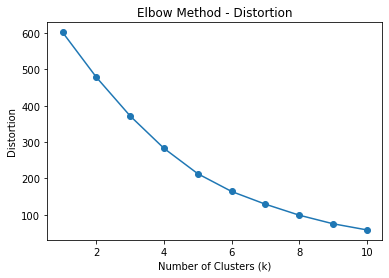

In [30]:
# Tabulate the results
results_df = pd.DataFrame({'k': k_values, 'Distortion': distortion_values_LDA})
print(results_df)

# Plotting the results
plt.plot(k_values, distortion_values_LDA, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method - Distortion')
plt.show()

# Visualizing the Results (Using different values of Inertia)

    k     Inertia
0   1  602.414710
1   2  478.513181
2   3  371.949423
3   4  282.835181
4   5  212.929372
5   6  164.128136
6   7  129.086132
7   8   98.862031
8   9   75.248711
9  10   58.345618


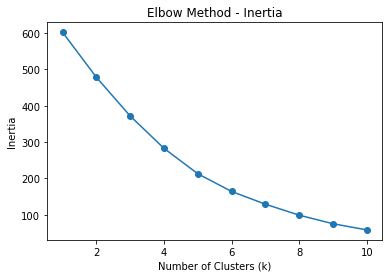

In [31]:
# Tabulate the results
results_df = pd.DataFrame({'k': k_values, 'Inertia': inertia_values_LDA})
print(results_df)

# Plotting the results
plt.plot(k_values, inertia_values_LDA, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

# EM clustering algorithm

In [32]:
# EM clustering algorithm
em = GaussianMixture(n_components=5, random_state=42)
em.fit(doc_vectors)
EM_LDA_LABEL = em.predict(doc_vectors)
EM_LDA_LABEL_NEW=map_label(EM_LDA_LABEL,human_label)
EM_LDA_LABEL

array([0, 1, 3, 1, 3, 1, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 1, 3, 0, 1, 1,
       1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       0, 1, 4, 0, 0, 1, 0, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 0, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 0, 3, 1, 1, 1, 1, 0, 0,
       1, 3, 1, 1, 1, 1, 0, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 0, 3, 1, 3,
       3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 4, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 4, 3, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 4, 3, 3, 3, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0,
       3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 3, 0, 3, 4, 3, 0, 4, 3, 4,
       0, 0, 0, 3, 0, 0, 4, 0, 0, 4, 0, 4, 0, 3, 4, 0, 3, 0, 3, 0, 0, 3,
       4, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 4, 3, 4, 3,

In [33]:
#kappa
kappa_score_EM_LDA =cohen_kappa_score(EM_LDA_LABEL,EM_LDA_LABEL_NEW)
print("kappa score in EM LDA = ", kappa_score_EM_LDA)

#silhouette
silhouette_score_EM_LDA = silhouette_score(doc_vectors, EM_LDA_LABEL)
print("silhouette score in EM LDA = ", silhouette_score_EM_LDA)

kappa score in EM LDA =  0.49750000000000005
silhouette score in EM LDA =  0.39916032385766476


# Akaike information criterion (AIC) or the Bayesian information criterion (BIC)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


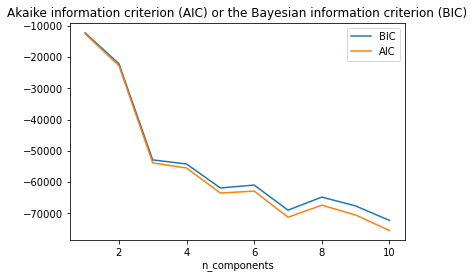

In [35]:
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

n_components = np.arange(1, 11)
models = [GaussianMixture(n, random_state=0) for n in n_components]
bic_scores = []
aic_scores = []

# Subsample the data
subsample_size = 1000
doc_vectors_subsample = shuffle(doc_vectors, random_state=0)[:subsample_size]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=min(subsample_size, doc_vectors.shape[1]))  # Adjust the number of components as needed
doc_vectors_pca = pca.fit_transform(doc_vectors_subsample)

for model in models:
    # Fit the model on the PCA-transformed data
    model.fit(doc_vectors_pca)

    # Calculate AIC and BIC scores
    bic_scores.append(model.bic(doc_vectors_pca))
    aic_scores.append(model.aic(doc_vectors_pca))

# Plotting the results
plt.plot(n_components, bic_scores, label='BIC')
plt.plot(n_components, aic_scores, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('Akaike information criterion (AIC) or the Bayesian information criterion (BIC)')

plt.show()

# Hierarchical clustering algorithm

In [36]:
# Hierarchical clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict((doc_vectors))
Hierarchical_LDA_LABEL_NEW=map_label(hierarchical_labels,human_label)
hierarchical_labels

array([0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4,
       4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0,
       4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 3, 4, 0, 0, 4, 3,
       0, 0, 3, 4, 0, 0, 3, 0, 0, 0, 0, 3, 0, 4, 3, 0, 4, 0, 4, 0, 0, 4,
       0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 4, 3, 4,

In [37]:
#kappa
kappa_score_Hierarchical_LDA =cohen_kappa_score(hierarchical_labels,Hierarchical_LDA_LABEL_NEW)
print("kappa score in Hierarchical LDA = ", kappa_score_Hierarchical_LDA)

#silhouette
silhouette_score_Hierarchical_LDA = silhouette_score(doc_vectors, hierarchical_labels)
print("silhouette score in EM LDA = ", silhouette_score_Hierarchical_LDA)

kappa score in Hierarchical LDA =  0.64625
silhouette score in EM LDA =  0.5071429274111481


# Error Analysis (Using adjusted Rand index)

In [38]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score

# Calculate adjusted Rand index
ari_score = adjusted_rand_score(human_label, hierarchical_labels)

print("Adjusted Rand index:", ari_score)

Adjusted Rand index: 0.5124380730649554


# Error Analysis (Using Fowlkes-Mallows index)

In [39]:
# Calculate Fowlkes-Mallows index
fm_score = fowlkes_mallows_score(human_label, hierarchical_labels)

print("Fowlkes-Mallows index:", fm_score)

Fowlkes-Mallows index: 0.6165768009879496


# Word Embedding

In [40]:
documents = data["partitions"].tolist()
tagged_documents = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(documents)]
model = Doc2Vec(tagged_documents, vector_size=100, window=5, min_count=1, workers=4)
document_vectors = [model.docvecs[str(i)] for i in range(len(tagged_documents))]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15344\232240868.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  document_vectors = [model.docvecs[str(i)] for i in range(len(tagged_documents))]


# K_Means

In [41]:
#K_Means WORD EMbedding
KM_WE=KMeans(n_clusters=5, random_state=42)
KM_WE.fit(document_vectors)
KM_WE_LABEL=KM_WE.predict(document_vectors)
KM_WE_LABEL_NEW=map_label(KM_WE_LABEL,human_label)

In [42]:
#kappa
kappa_score_kmeans_WE=cohen_kappa_score(KM_WE_LABEL,KM_WE_LABEL_NEW)
print("kappa score in kmeans WE = ", kappa_score_kmeans_WE)

#silhouette
silhouette_score_kmeans_WE = silhouette_score(document_vectors, KM_WE_LABEL)
print("silhouette score in kmeans WE = ", silhouette_score_kmeans_WE)

kappa score in kmeans WE =  0.11499999999999999
silhouette score in kmeans WE =  0.1975473


# Error Analysis (Using Elbow Method)

In [44]:
k_values = range(1, 11)
distortion_values_WE = []
inertia_values_WE = []

for k in k_values:
    KM_WE = KMeans(n_clusters=k, random_state=42)
    KM_WE.fit(document_vectors)
    distortion_values_WE.append(KM_WE.inertia_)
    inertia_values_WE.append(KM_WE.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# Visualizing the Results (Using the different values of Distortion)

    k   Distortion
0   1  1257.603210
1   2   863.962818
2   3   718.747714
3   4   635.076073
4   5   579.121350
5   6   533.589896
6   7   495.364194
7   8   463.538019
8   9   435.595620
9  10   416.199187


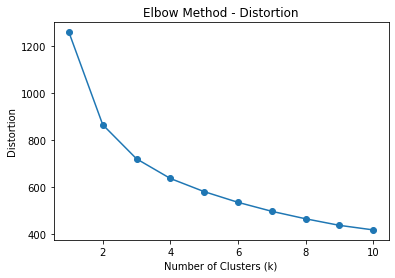

In [45]:
# Tabulate the results
results_df = pd.DataFrame({'k': k_values, 'Distortion': distortion_values_WE})
print(results_df)

# Plotting the results
plt.plot(k_values, distortion_values_WE, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method - Distortion')
plt.show()

# Visualizing the Results (Using different values of Inertia)

    k      Inertia
0   1  1257.603210
1   2   863.962818
2   3   718.747714
3   4   635.076073
4   5   579.121350
5   6   533.589896
6   7   495.364194
7   8   463.538019
8   9   435.595620
9  10   416.199187


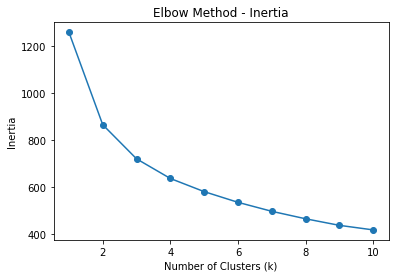

In [46]:
# Tabulate the results
results_df = pd.DataFrame({'k': k_values, 'Inertia': inertia_values_WE})
print(results_df)

# Plotting the results
plt.plot(k_values, inertia_values_WE, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

# EM clustering algorithm

In [47]:
# EM clustering algorithm
em = GaussianMixture(n_components=5, random_state=42)
em.fit(document_vectors)
EM_WE_LABEL = em.predict(document_vectors)
EM_WE_LABEL_NEW=map_label(EM_WE_LABEL,human_label)
EM_WE_LABEL

array([3, 0, 2, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 1, 0, 0, 1, 0, 2, 3, 1, 1,
       1, 2, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       3, 1, 4, 3, 3, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       0, 0, 3, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 2, 0, 3, 0, 1, 1, 1, 2, 1,
       3, 1, 1, 0, 1, 2, 4, 2, 3, 1, 1, 1, 3, 4, 0, 3, 1, 4, 1, 1, 0, 3,
       1, 3, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 4,
       0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 3, 3, 1, 3,
       3, 0, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 3, 1, 4, 2, 2, 1, 1, 2, 1, 3, 3, 3, 3, 4, 1, 1, 1, 1,
       0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 4, 2, 0, 4, 3, 3, 3, 0, 0, 4,
       3, 3, 0, 3, 0, 3, 0, 2, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 4, 0, 3, 0,
       3, 3, 0, 3, 3, 0, 3, 2, 3, 3, 3, 0, 3, 2, 0, 2, 0, 3, 3, 0, 3, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 4, 4, 4, 4, 4, 3, 4, 3, 2, 4, 3, 4, 4, 3,
       4, 3, 3, 4, 2, 3, 3, 3, 3, 4, 3, 4, 2, 4, 2,

In [49]:
#kappa
kappa_score_EM_WE =cohen_kappa_score(EM_WE_LABEL,EM_WE_LABEL_NEW)
print("kappa score in EM WE = ", kappa_score_EM_WE)

#silhouette
silhouette_score_EM_WE = silhouette_score(document_vectors, EM_WE_LABEL)
print("silhouette score in EM WE = ", silhouette_score_EM_WE)

kappa score in EM WE =  0.15125
silhouette score in EM WE =  0.16639692


# Akaike information criterion (AIC) or the Bayesian information criterion (BIC)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


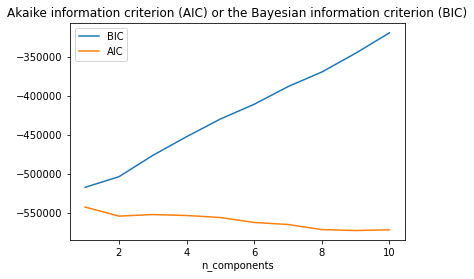

In [52]:
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

n_components = np.arange(1, 11)
models = [GaussianMixture(n, random_state=0) for n in n_components]
bic_scores = []
aic_scores = []

# Subsample the data
subsample_size = 1000
_subsample = shuffle(document_vectors, random_state=0)[:subsample_size]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components as needed
document_vectors_pca = pca.fit_transform(document_vectors_subsample)

for model in models:
    # Fit the model on the PCA-transformed data
    model.fit(document_vectors_pca)

    # Calculate AIC and BIC scores
    bic_scores.append(model.bic(document_vectors_pca))
    aic_scores.append(model.aic(document_vectors_pca))

# Plotting the results
plt.plot(n_components, bic_scores, label='BIC')
plt.plot(n_components, aic_scores, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('Akaike information criterion (AIC) or the Bayesian information criterion (BIC)')

plt.show()

# Hierarchical clustering algorithm

In [63]:
# Hierarchical clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict((document_vectors))
Hierarchical_WE_LABEL_NEW=map_label(hierarchical_labels,human_label)
hierarchical_labels

array([4, 2, 1, 2, 1, 2, 4, 2, 1, 1, 4, 2, 4, 0, 2, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 4,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 4, 0,
       2, 2, 1, 4, 2, 4, 2, 2, 2, 2, 1, 2, 2, 3, 2, 1, 0, 0, 4, 1, 0, 1,
       1, 0, 1, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 3, 3, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0,
       2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 2, 2, 0,
       1, 4, 0, 3, 2, 1, 2, 1, 1, 1, 2, 1, 4, 0, 4, 1, 1, 4, 0, 0, 1, 2,
       1, 4, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1, 2,
       2, 0, 2, 1, 2, 4, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 3, 3, 0, 1, 3, 1, 4, 1, 0, 4, 0, 1, 0, 1,

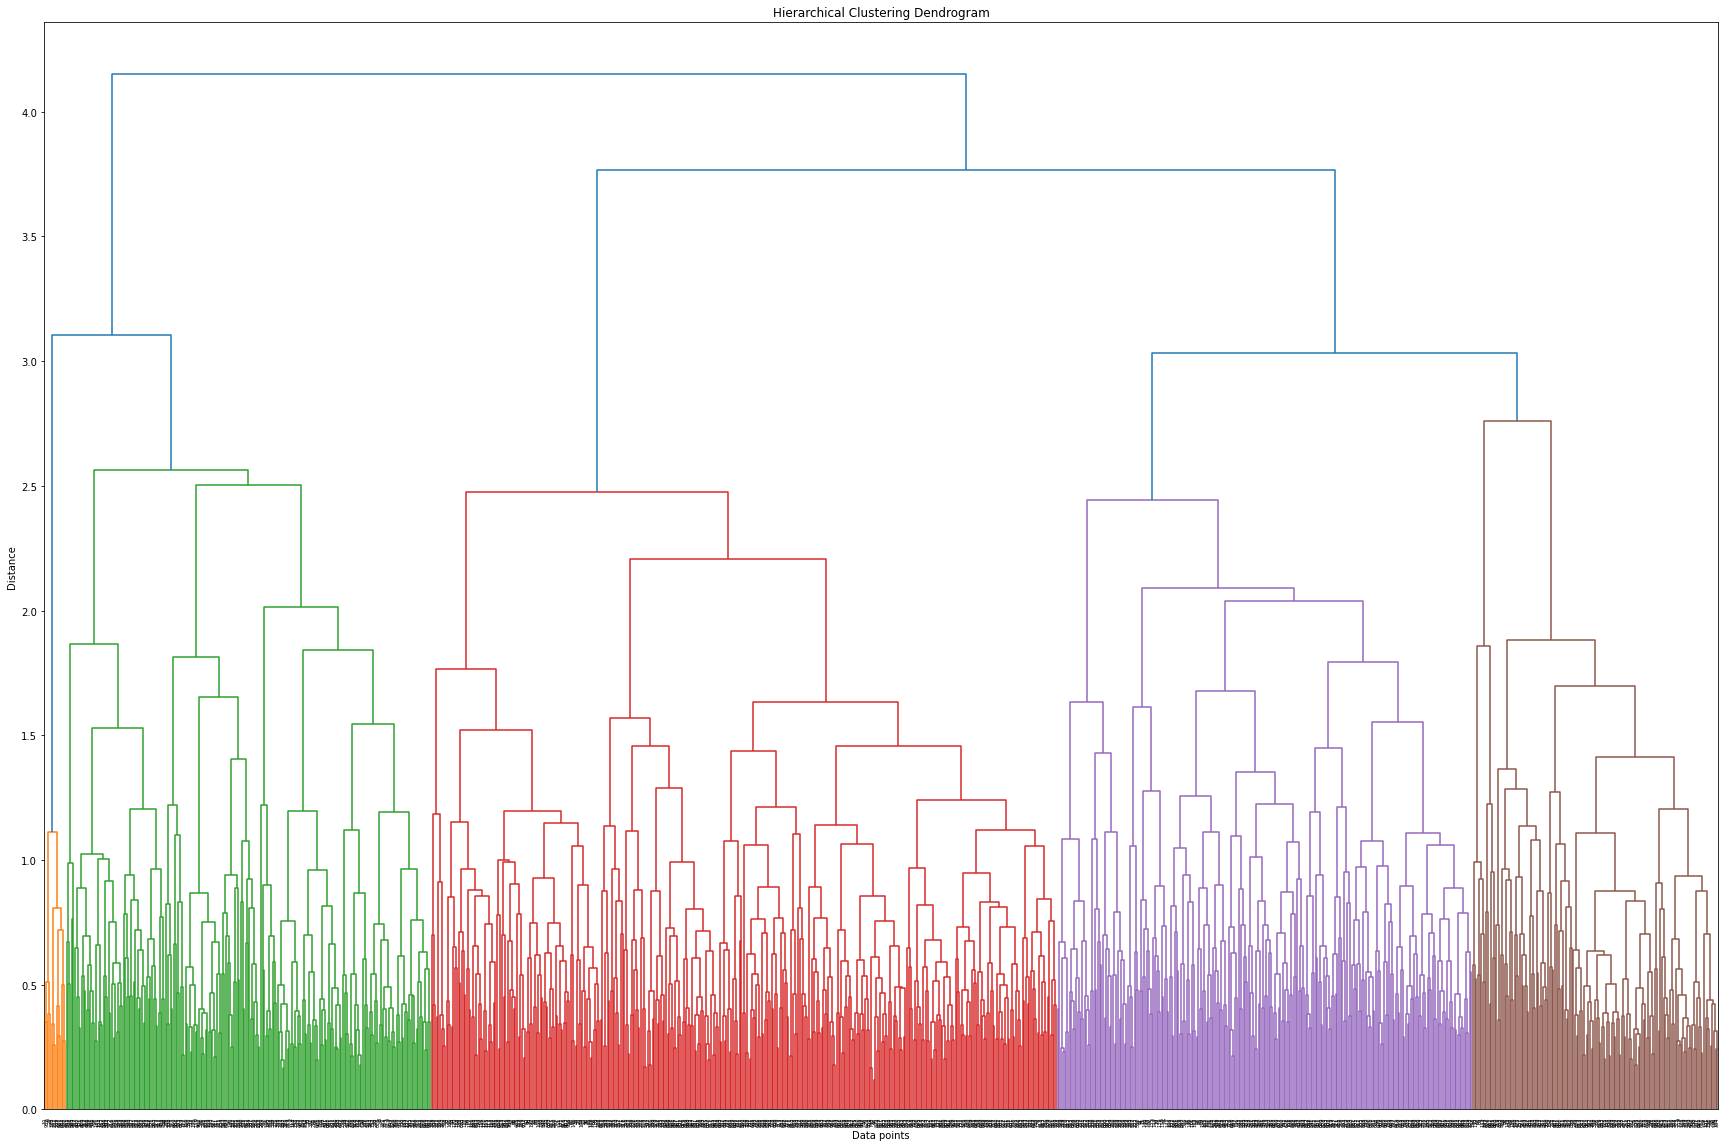

In [69]:
linked = linkage(document_vectors, 'complete')  # You can choose different linkage methods (single, complete, average, etc.)

# Create a dendrogram
plt.figure(figsize=(30, 20))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [65]:
#kappa
kappa_score_kmeans_WE=cohen_kappa_score(KM_WE_LABEL,KM_WE_LABEL_NEW)
print("kappa score in kmeans WE= ", kappa_score_kmeans_WE)

#silhouette
silhouette_score_kmeans_WE = silhouette_score(document_vectors, KM_WE_LABEL)
print("silhouette score in kmeans WE = ", silhouette_score_kmeans_WE)

kappa score in kmeans WE=  -0.02750000000000008
silhouette score in kmeans WE =  0.1975473


# Error Analysis (Using adjusted Rand index)

In [66]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score

# Calculate adjusted Rand index
ari_score = adjusted_rand_score(human_label, hierarchical_labels)

print("Adjusted Rand index:", ari_score)

Adjusted Rand index: 0.07715360893069159


# Error Analysis (Using Fowlkes-Mallows index)

In [68]:
# Calculate Fowlkes-Mallows index
fm_score = fowlkes_mallows_score(human_label, hierarchical_labels)

print("Fowlkes-Mallows index:", fm_score)

Fowlkes-Mallows index: 0.2906102486275637
